###Solving 8-Puzzle using A* Algorithm.
#### N-Puzzle or sliding puzzle is a popular puzzle that consists of N tiles where N can be 8, 15, 24, and so on. In our example N = 8. The puzzle is divided into sqrt(N+1) rows and sqrt(N+1) columns. Eg. 15-Puzzle will have 4 rows and 4 columns and an 8-Puzzle will have 3 rows and 3 columns. The puzzle consists of N tiles and one empty space where the tiles can be moved. Start and Goal configurations (also called state) of the puzzle are provided. The puzzle can be solved by moving the tiles one by one in the single empty space and thus achieving the Goal configuration.

###Rules for solving the puzzle.
Instead of moving the tiles in the empty space, we can visualize moving the empty space in place of the tile, basically swapping the tile with the empty space. The empty space can only move in four directions viz.,

1. Up
2.Down
3. Right or
4. Left

The empty space cannot move diagonally and can take only one step at a time (i.e. move the empty space one position at a time).

### Informed search is exactly opposite to the uninformed search. In this, the algorithm is aware of where the best chances of finding the element are and the algorithm heads that way! Heuristic search is an informed search technique. A heuristic value tells the algorithm which path will provide the solution as early as possible. The heuristic function is used to generate this heuristic value. Different heuristic functions can be designed depending on the searching problem. So we can conclude that Heuristic search is a technique that uses a heuristic value for optimizing the search.

### The key feature of the A* algorithm is that it keeps a track of each visited node which helps in ignoring the nodes that are already visited, saving a huge amount of time.
So we use two lists namely ‘open list‘ and ‘closed list‘ the open list contains all the nodes that are being generated and are not existing in the closed list and each node explored after it’s neighboring nodes are discovered is put in the closed list and the neighbors are put in the open list this is how the nodes expand. Each node has a pointer to its parent so that at any given point it can retrace the path to the parent. Initially, the open list holds the start(Initial) node. The next node chosen from the open list is based on its f score, the node with the least f score is picked up and explored.

###f-score = h-score + g-score

A* uses a combination of heuristic value (h-score: how far the goal node is) as well as the g-score (i.e. the number of nodes traversed from the start node to current node).

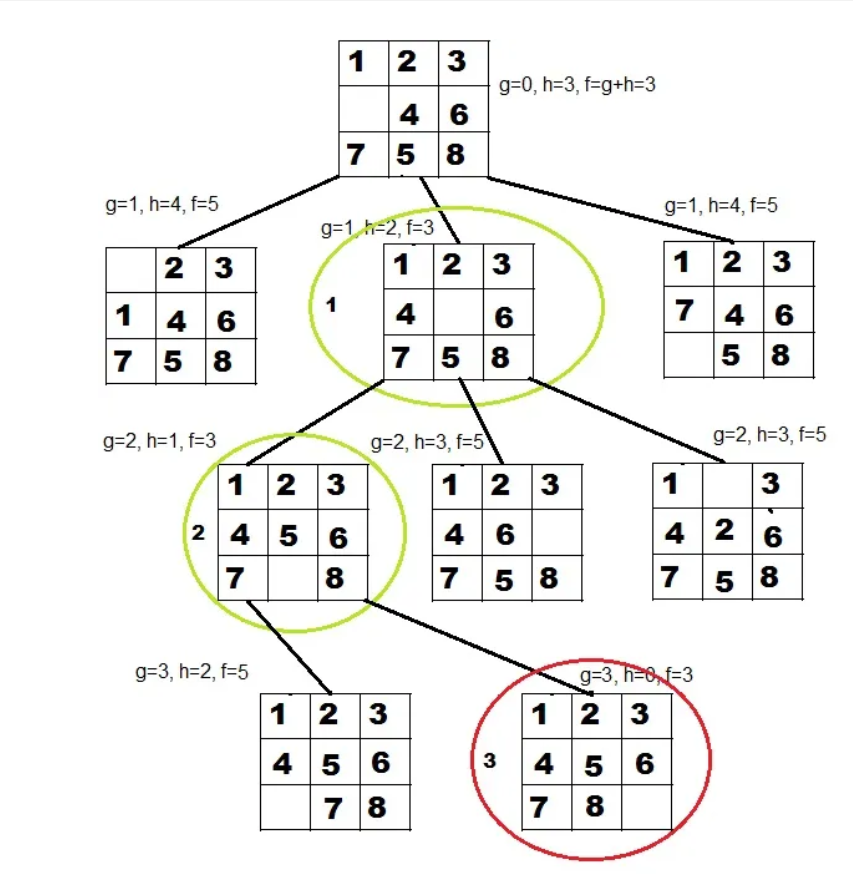

### Python Implementation
Node class defines the structure of the state(configuration) and also provides functions to move the empty space and generate child states from the current state. Puzzle class accepts the initial and goal states of the N-Puzzle problem and provides functions to calculate the f-score of any given node(state).

In [1]:
class Node:
    def __init__(self,data,level,fval):
        """ Initialize the node with the data, level of the node and the calculated fvalue """
        self.data = data
        self.level = level
        self.fval = fval

    def generate_child(self):
        """ Generate child nodes from the given node by moving the blank space
            either in the four directions {up,down,left,right} """
        x,y = self.find(self.data,'_')
        """ val_list contains position values for moving the blank space in either of
            the 4 directions [up,down,left,right] respectively. """
        val_list = [[x,y-1],[x,y+1],[x-1,y],[x+1,y]]
        children = []
        for i in val_list:
            child = self.shuffle(self.data,x,y,i[0],i[1])
            if child is not None:
                child_node = Node(child,self.level+1,0)
                children.append(child_node)
        return children

    def shuffle(self,puz,x1,y1,x2,y2):
        """ Move the blank space in the given direction and if the position value are out
            of limits the return None """
        if x2 >= 0 and x2 < len(self.data) and y2 >= 0 and y2 < len(self.data):
            temp_puz = []
            temp_puz = self.copy(puz)
            temp = temp_puz[x2][y2]
            temp_puz[x2][y2] = temp_puz[x1][y1]
            temp_puz[x1][y1] = temp
            return temp_puz
        else:
            return None


    def copy(self,root):
        """ Copy function to create a similar matrix of the given node"""
        temp = []
        for i in root:
            t = []
            for j in i:
                t.append(j)
            temp.append(t)
        return temp

    def find(self,puz,x):
        """ Specifically used to find the position of the blank space """
        for i in range(0,len(self.data)):
            for j in range(0,len(self.data)):
                if puz[i][j] == x:
                    return i,j

In [2]:
class Puzzle:
    def __init__(self,size):
        """ Initialize the puzzle size by the specified size,open and closed lists to empty """
        self.n = size
        self.open = []
        self.closed = []

    def accept(self):
        """ Accepts the puzzle from the user """
        puz = []
        for i in range(0,self.n):
            temp = input().split(" ")
            puz.append(temp)
        return puz

    def f(self,start,goal):
        """ Heuristic Function to calculate hueristic value f(x) = h(x) + g(x) """
        return self.h(start.data,goal)+start.level

    def h(self,start,goal):
        """ Calculates the different between the given puzzles """
        temp = 0
        for i in range(0,self.n):
            for j in range(0,self.n):
                if start[i][j] != goal[i][j] and start[i][j] != '_':
                    temp += 1
        return temp


    def process(self):
        """ Accept Start and Goal Puzzle state"""
        print("Enter the start state matrix \n")
        start = self.accept()
        print("Enter the goal state matrix \n")
        goal = self.accept()

        start = Node(start,0,0)
        start.fval = self.f(start,goal)
        """ Put the start node in the open list"""
        self.open.append(start)
        print("\n\n")
        while True:
            cur = self.open[0]
            print("")
            print("  | ")
            print("  | ")
            print(" \\\'/ \n")
            for i in cur.data:
                for j in i:
                    print(j,end=" ")
                print("")
            """ If the difference between current and goal node is 0 we have reached the goal node"""
            if(self.h(cur.data,goal) == 0):
                break
            for i in cur.generate_child():
                i.fval = self.f(i,goal)
                self.open.append(i)
            self.closed.append(cur)
            del self.open[0]

            """ sort the opne list based on f value """
            self.open.sort(key = lambda x:x.fval,reverse=False)


puz = Puzzle(3)
puz.process()

Enter the start state matrix 

1 2 3
_ 4 6
7 5 8
Enter the goal state matrix 

1 2 3
4 5 6
7 8 _




  | 
  | 
 \'/ 

1 2 3 
_ 4 6 
7 5 8 

  | 
  | 
 \'/ 

1 2 3 
4 _ 6 
7 5 8 

  | 
  | 
 \'/ 

1 2 3 
4 5 6 
7 _ 8 

  | 
  | 
 \'/ 

1 2 3 
4 5 6 
7 8 _ 
